In [75]:
# package needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [76]:
def import_data(file_name):
    airbnb =  pd.read_csv(file_name)
    return airbnb
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle

data = import_data('AB_NYC_2019.csv')

data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [78]:
data.drop(['id','host_name','last_review'], axis=1, inplace=True)

data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

In [79]:
data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [80]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [81]:
data.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [82]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [83]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

221

In [84]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [85]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [86]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [87]:
# Exclude property with listed price of 0
data = data.loc[data['price'] > 0]

In [88]:
#examine the dataset
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Machine Learning

In [89]:
data_encoded = data.copy()

 This Process is very similar to get dummies 

In [90]:
# Recode data as categorical
# https://datascience.stackexchange.com/questions/29093/continuous-variable-to-categorical-by-quartiles
data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])

In [91]:
data_encoded.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,minimum_nights_low,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_high,availability_high
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,minimum_nights_low,number_of_reviews_low,reviews_per_month_low,calculated_host_listings_count_low,availability_high
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,minimum_nights_high,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_low
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_low
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_high,availability_high


/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

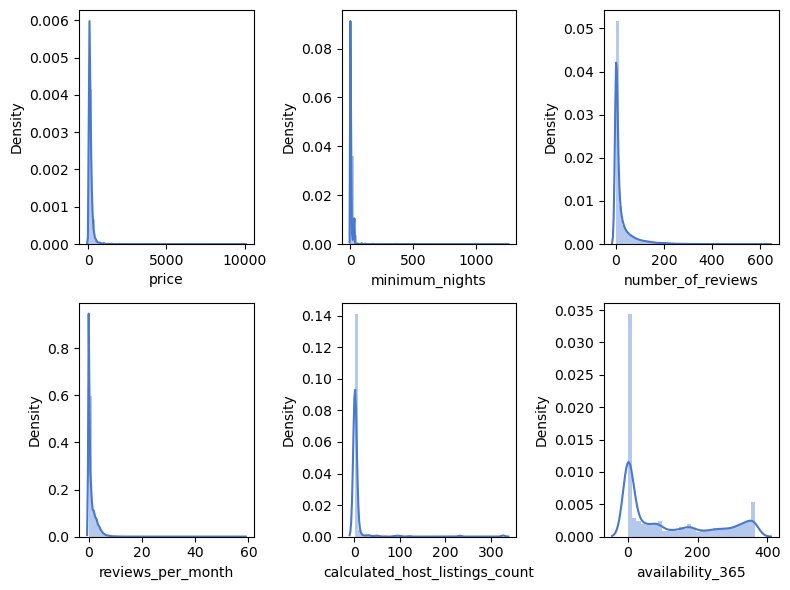

In [92]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

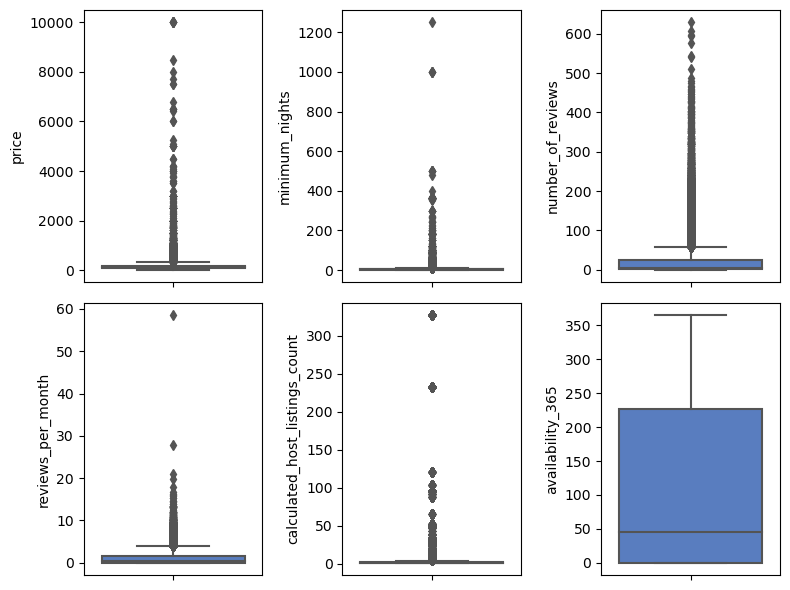

In [93]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


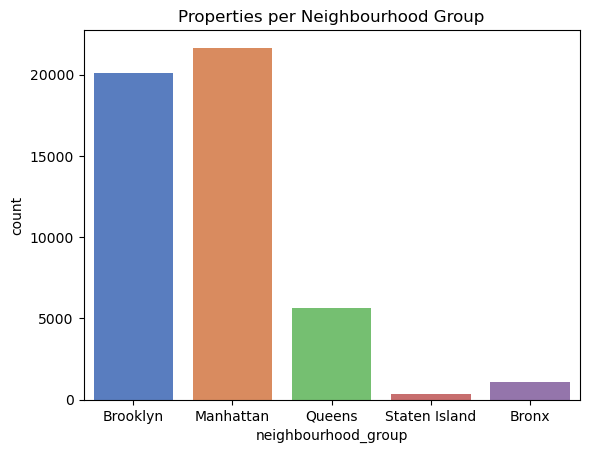

In [94]:
title = 'Properties per Neighbourhood Group'
sns.countplot(data['neighbourhood_group'])
plt.title(title)
plt.ioff()

In [95]:
title = 'Properties per Room Type'
sns.countplot(data['room_type'])
plt.title(title)
plt.ioff()

/Users/min/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [97]:
# Assuming your DataFrame is named 'data'
# Drop irrelevant columns or handle missing data as needed
features = airbnb[['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
target = airbnb['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import urllib.request
from io import BytesIO

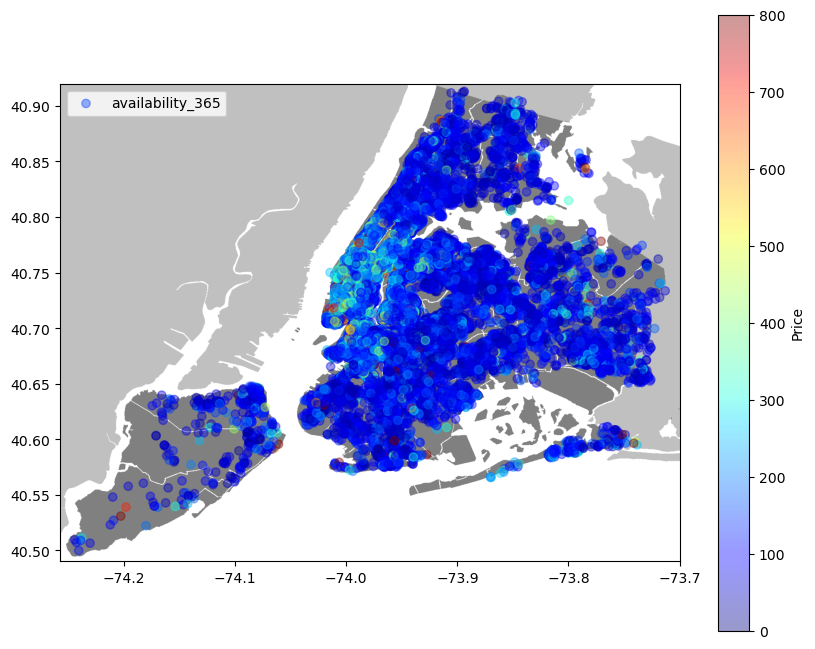

In [ ]:
# Initializing the figure size
plt.figure(figsize=(10, 8))

# Loading the NYC image
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
img_data = i.read()
nyc_img = plt.imread(BytesIO(img_data))

# Scaling the image based on the latitude and longitude max and mins
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()


# Scatter plot with vmin and vmax parameters
scatter = ax.scatter(
    x=airbnb['longitude'],
    y=airbnb['latitude'],
    label='availability_365',
    c=airbnb['price'],
    cmap=plt.get_cmap('jet'),
    alpha=0.4,
    zorder=5,
    vmin=0,
    vmax=800  # Set the limits based on your data range
)

# Adding colorbar
colorbar = plt.colorbar(scatter, label='Price')

plt.legend()
plt.show()

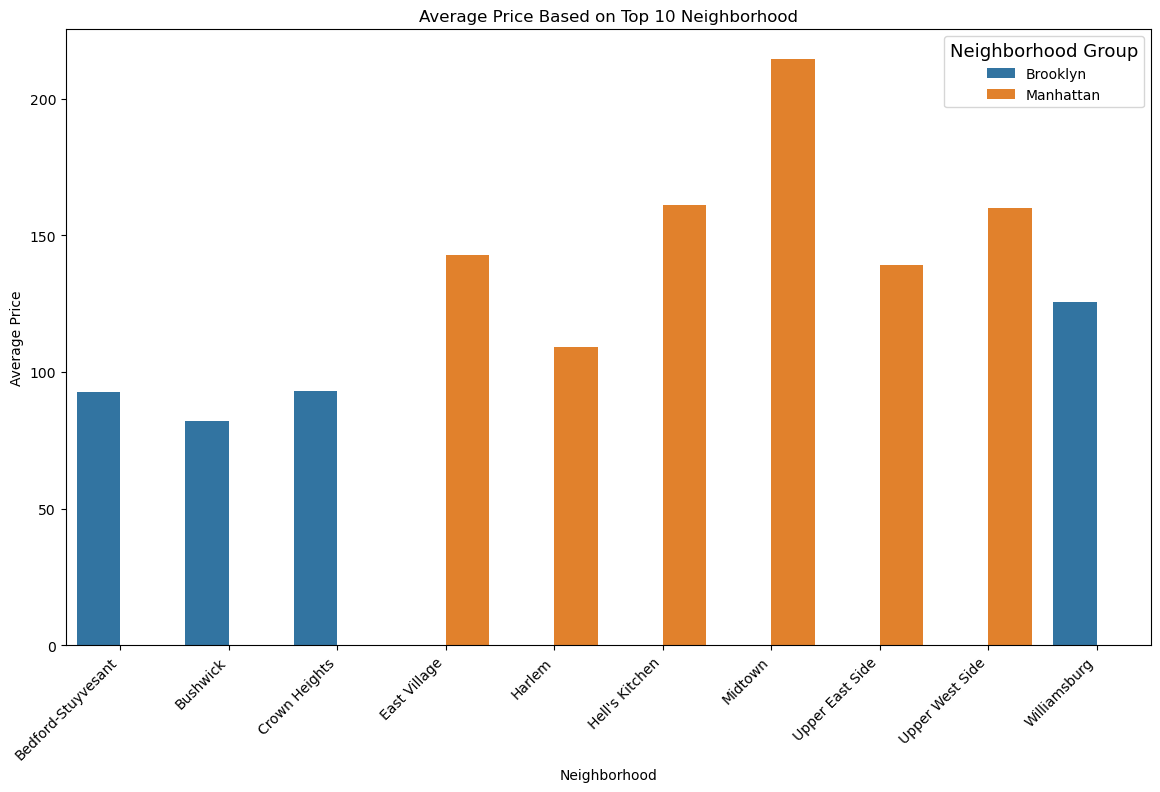

In [ ]:
# Grabbing top 10 neighborhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

# Calculate average price for each combination of neighborhood, neighborhood group, and room type
average_prices = sub_7.groupby(['neighbourhood', 'neighbourhood_group', 'room_type'])['price'].mean().reset_index()

# Using barplot to represent average prices
plt.figure(figsize=(14, 8))
viz_3 = sns.barplot(x='neighbourhood', y='price', hue='neighbourhood_group', data=average_prices, ci=None)
viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price Based on Top 10 Neighborhood')

# Adding legend
plt.legend(title='Neighborhood Group', title_fontsize='13')

# Display the plot
plt.show()






In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


/var/folders/6w/js_5z4xs7cv__kfsgg74twqh0000gn/T/ipykernel_17407/2183349542.py:25: RuntimeWarning: invalid value encountered in log1p
  y_pred_log = np.log1p(y_pred)


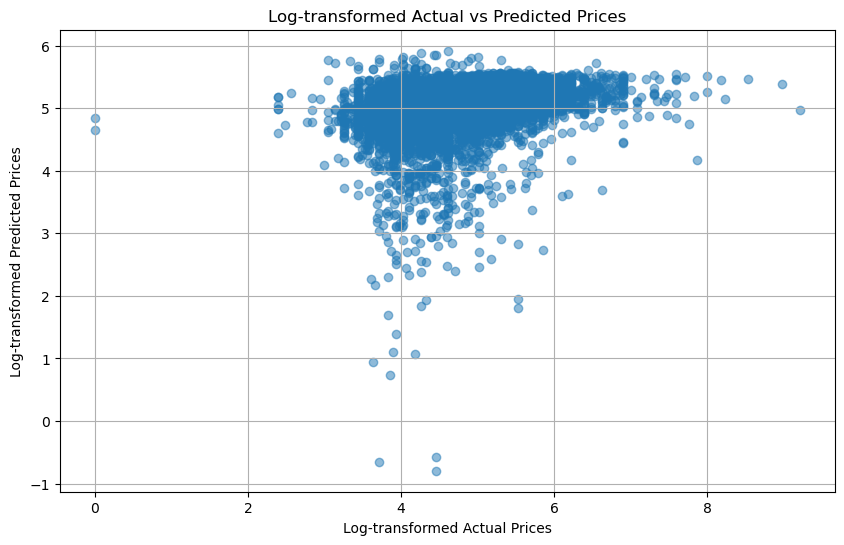

Mean Absolute Error: 84.51
Mean Squared Error: 42566.40
R-squared: 0.04


In [ ]:
features = airbnb[['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
target = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Choose and train the model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Apply log transformation to handle outliers
y_test_log = np.log1p(y_test)
y_pred_log = np.log1p(y_pred)

# Create a scatter plot for log-transformed actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_log, y_pred_log, alpha=0.5)
plt.title('Log-transformed Actual vs Predicted Prices')
plt.xlabel('Log-transformed Actual Prices')
plt.ylabel('Log-transformed Predicted Prices')
plt.grid(True)
plt.show()

# Print evaluation metrics for the log-transformed data
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')